# Analisis Data Lending Club Loan
Tujuan dari analisis ini adalah untuk melihat bagaimana kondisi dari status pinjaman apakah dapat berhasil dilunasi (Fully Paid) atau tidak dilunasi dengan baik (Charged Off). Analisis dilakukan dengan membuat grafik untuk masing-masing kolom terhadap status pinjaman (loan_status).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('loan_clean.csv')

In [4]:
df.shape

(1228167, 13)

In [5]:
df.nunique()

loan_amnt               1553
funded_amnt             1553
term                       2
int_rate                 654
grade                      7
emp_length                11
home_ownership             6
annual_inc             55422
verification_status        3
issue_d                  139
loan_status                2
purpose                   14
dti                     6314
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228167 entries, 0 to 1228166
Data columns (total 13 columns):
loan_amnt              1228167 non-null int64
funded_amnt            1228167 non-null int64
term                   1228167 non-null object
int_rate               1228167 non-null float64
grade                  1228167 non-null object
emp_length             1228167 non-null object
home_ownership         1228167 non-null object
annual_inc             1228167 non-null float64
verification_status    1228167 non-null object
issue_d                1228167 non-null object
loan_status            1228167 non-null object
purpose                1228167 non-null object
dti                    1228167 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 121.8+ MB


**Penjelasan Kolom**

loan_amnt = jumlah pinjaman yang diminta oleh peminjam dana <br>
funded_amnt = jumlah pinjaman yang diberikan investor <br>
term = waktu pelunasan dari pinjaman <br>
int_rate = interest rate dari pinjaman <br>
grade = credit score grade dari peminjam dana <br>
emp_length = lama waktu peminjam dana bekerja <br>
home_ownership = tipe kepemilikan rumah dari peminjam dana <br>
annual_inc = pendapatan pertahun dari peminjam <br>
verification_status = status dari peminjam dana terverifikasi atau belum <br>
issue_d = tanggal pinjaman diberikan <br>
loan_status = status pinjaman <br>
purpose = tujuan peminjaman dana <br>
dti = debt to income, rasio antara hutang dan pendapatan peminjam <br>

In [7]:
# Mengubah tipe data kolom kategori
df['term'] = df['term'].astype('category')
df['grade'] = df['grade'].astype('category')
df['emp_length'] = df['emp_length'].astype('category')
df['home_ownership'] = df['home_ownership'].astype('category')
df['verification_status'] = df['verification_status'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')

In [8]:
# Mengubah tipe data kolom issue_d menjadi datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d')

In [9]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti'],
      dtype='object')

In [10]:
# membagi data menjadi data loan_status Fully Paid dan Charge Off
df_fully_paid = df[df['loan_status'] == 'Fully Paid']
df_charged_off = df[df['loan_status'] == 'Charged Off']

## Interpretasi Data

### Kolom Numeric

In [11]:
# Definis fungsi untuk melihat distribusi dari data numerik
def show_distplot(num_column):
    sns.distplot(df_fully_paid[num_column], label='Fully Paid')
    sns.distplot(df_charged_off[num_column], label='Charged Off')
    plt.legend()
    plt.show()

**Loan amount**

In [12]:
df['loan_amnt'].describe()

count    1.228167e+06
mean     1.459702e+04
std      8.728569e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.212500e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

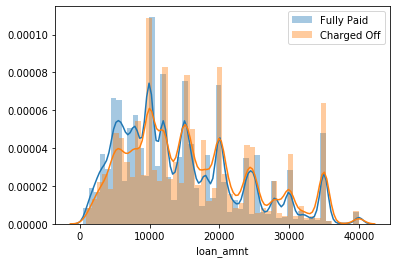

In [13]:
show_distplot('loan_amnt')

Tidak terlihat perbedaan yang mencolok antara loan_status 'Fully Paid' dan loan_status 'Charged Off'. Rentang jumlah yang dipinjam adalah dari 500 sampai dengan 40000 dollar.

**Interest Rate**

In [14]:
df['int_rate'].describe()

count    1.228167e+06
mean     1.325151e+01
std      4.761717e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

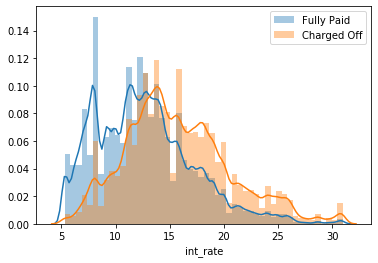

In [15]:
show_distplot('int_rate')

Peminjam yang status pinjamannya "Charged Off" memiliki interest rate yang relatif lebih tinggi dibandingkan dengan orang yang memiliki status pinjaman "Fully Paid".

**Annual Income**

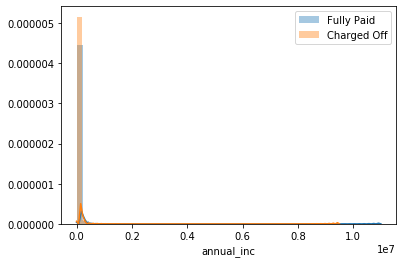

In [16]:
show_distplot('annual_inc')

Annual income memiliki nilai pencilan. Kita akan menghilangkan data pencilan terlebih dahulu.

In [17]:
# Mendefinisikan batas_min dan batas_max untuk kolom annual income
q1 = np.percentile(df['annual_inc'], 25)
q3 = np.percentile(df['annual_inc'], 75)
iqr = q3 - q1
batas_min = q1 - (1.5 * iqr)
batas_max = q3 + (1.5 * iqr)

In [18]:
df_ann_inc = df[['annual_inc', 'loan_status']]

In [19]:
def annual_inc_outlier(ser):
    if (ser < batas_min) or (ser > batas_max):
        return 1
    else:
        return 0

In [20]:
# mengklasifikasikan data menjadi outlier (1) atau bukan (0)
df_ann_inc['outlier'] = df_ann_inc['annual_inc'].apply(annual_inc_outlier)

In [21]:
df_ann_inc['outlier'].value_counts(normalize=True)

0    0.949769
1    0.050231
Name: outlier, dtype: float64

In [22]:
# menghilangkan data outlier
idx_to_drop = df_ann_inc[df_ann_inc['outlier'] == 1].index
df_ann_inc.drop(idx_to_drop, inplace=True)

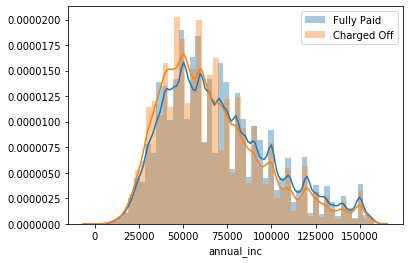

In [23]:
# plot data annual income tanpa outlier
sns.distplot(df_ann_inc[df_ann_inc['loan_status'] == 'Fully Paid']['annual_inc'], label='Fully Paid')
sns.distplot(df_ann_inc[df_ann_inc['loan_status'] == 'Charged Off']['annual_inc'], label='Charged Off')
plt.legend()
plt.show()

In [24]:
df_ann_inc['annual_inc'].describe()

count    1.166475e+06
mean     6.928869e+04
std      3.009653e+04
min      3.300000e+01
25%      4.600000e+04
50%      6.500000e+04
75%      8.750000e+04
max      1.583430e+05
Name: annual_inc, dtype: float64

Distribusi pendapatan pertahun untuk peminjam dengan status Charged Off lebih banyak dibandingan dengan status Fully Paid pada rentang 0 - 60000. Tetapi, untuk pendapatan 60000 ke atas, lebih banyak peminjam yang dapat membayar lunas pinjamannya.

**DTI**

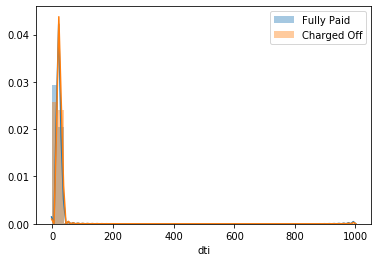

In [25]:
show_distplot('dti')

Sama halnya dengan kolom annual income, terdapat pencilan di dalam kolom dti.

In [26]:
df_fully_paid2 = df_fully_paid.copy()
df_charged_off2 = df_charged_off.copy()

In [27]:
# Fully paid outlier
q1 = np.percentile(df_fully_paid2['dti'], 25)
q3 = np.percentile(df_fully_paid2['dti'], 75)
iqr = q3 - q1
batas_min = q1 - (1.5 * iqr)
batas_max = q3 + (1.5 * iqr)

def dti_outlier(ser):
    if (ser < batas_min) or (ser > batas_max):
        return 1
    else:
        return 0
    
df_fully_paid2['outlier_dti'] = df_fully_paid2['dti'].apply(dti_outlier)

In [28]:
# Charged off outlier
q1 = np.percentile(df_charged_off2['dti'], 25)
q3 = np.percentile(df_charged_off2['dti'], 75)
iqr = q3 - q1
batas_min = q1 - (1.5 * iqr)
batas_max = q3 + (1.5 * iqr)

def dti_outlier(ser):
    if (ser < batas_min) or (ser > batas_max):
        return 1
    else:
        return 0
    
df_charged_off2['outlier_dti'] = df_charged_off2['dti'].apply(dti_outlier)

In [29]:
df_outlier_dti = pd.concat([df_fully_paid2, df_charged_off2])

In [30]:
idx_to_drop = df_outlier_dti[df_outlier_dti['outlier_dti'] == 1].index

df_outlier_dti.drop(idx_to_drop, inplace=True)

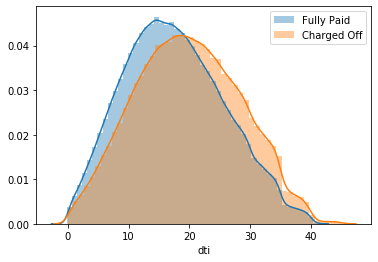

In [31]:
#plot kembali distribusi kolom dti
sns.distplot(df_outlier_dti[df_outlier_dti['loan_status'] == 'Fully Paid']['dti'], label='Fully Paid')
sns.distplot(df_outlier_dti[df_outlier_dti['loan_status'] == 'Charged Off']['dti'], label='Charged Off')
plt.legend()
plt.show()

Peminjam dengan status Charged Off memiliki dti yang cenderung lebih tinggi dibandingkan peminjam dengan status Fully Paid

### Kolom Kategorikal

In [32]:
def show_plot_percentage(num_column):
    colors = ["#006D2C", "#31A354"]
    pivot_df = df.pivot_table(index=num_column, columns='loan_status', values='loan_amnt', aggfunc='count')
    for element in df[num_column].unique():
        pivot_df.loc[element] = pivot_df.loc[element] / pivot_df.loc[element].sum() * 100
    pivot_df.plot.bar(stacked=True, color=colors)

In [33]:
def show_count_plot(num_column):
    sns.countplot(num_column, hue='loan_status', data=df, saturation=1, edgecolor='white')
    if df[num_column].nunique() > 7:
        plt.xticks(rotation=60)
    plt.show()

**Term**

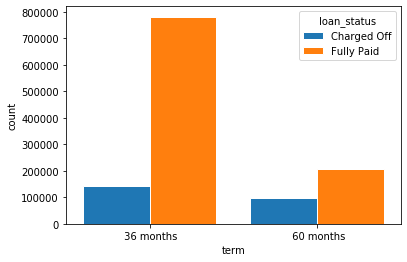

In [34]:
show_count_plot('term')

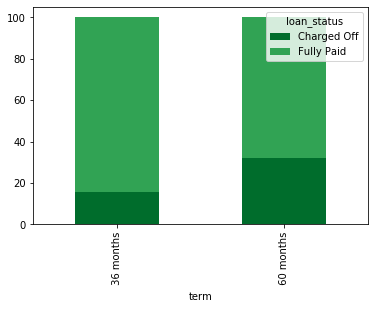

In [35]:
show_plot_percentage('term')

peminjaman dengan term 60 bulan memiliki presentase peminjam dengan status charged off dibandingkan dengan peminjaman dengan term 36 bulan.

**Grade**

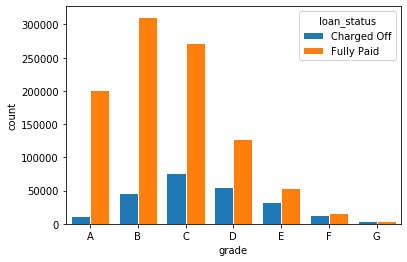

In [36]:
show_count_plot('grade')

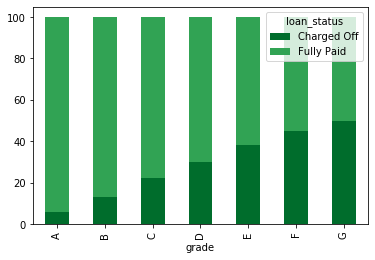

In [37]:
show_plot_percentage('grade')

Semakin tinggi grade (grade E, F, G) maka semakin tinggi presentasi dari status pinjaman Charged Off. Grade G memiliki presentasi pinjaman Charged Off sebanyak hampir 50%.

**Employee Length**

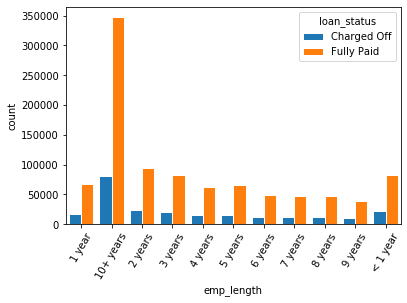

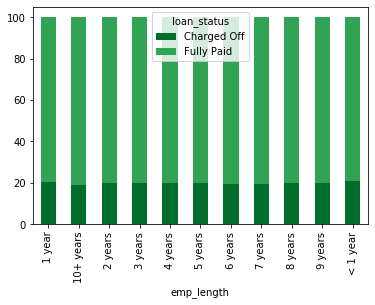

In [38]:
show_count_plot('emp_length')
show_plot_percentage('emp_length')

Setiap kategori dalam lama bekerja memiiki presentase pinjaman charged off yang hampir sama.

**Home Ownership**

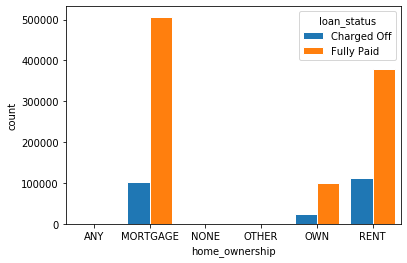

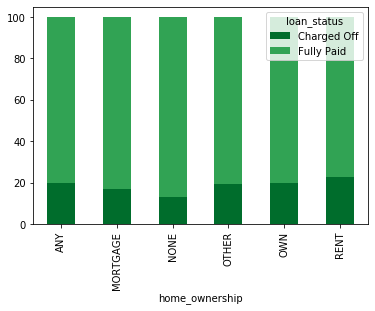

In [39]:
show_count_plot('home_ownership')
show_plot_percentage('home_ownership')

Setiap kategori dalam status kepemilikan rumah memiliki presentase pinjaman dengan status charged off yang hampir sama.

**Verification Status**

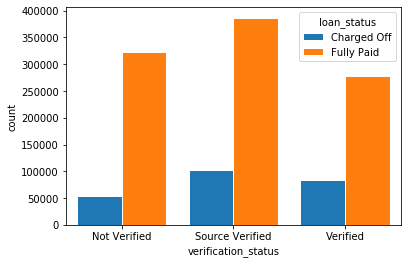

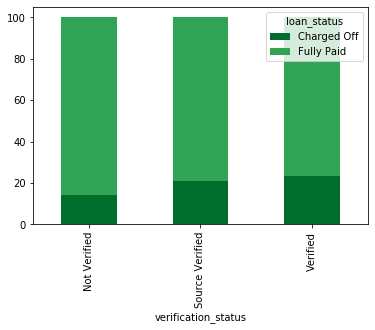

In [40]:
show_count_plot('verification_status')
show_plot_percentage('verification_status')

Pinjaman yan terverifikasi memilii jumlah status presentase pinjaman Charged Off yang lebih banyak dibandingkan pinjaman yang tidak terverifikasi. Hal ini cukup mengagetkan, seharusnya pinjaman dengan data peminjam yang terverifikasi memiliki kemungkinan yang lebih sedikit untuk peminjam tidak dapat melunasi hutangnya.

**Purpose**

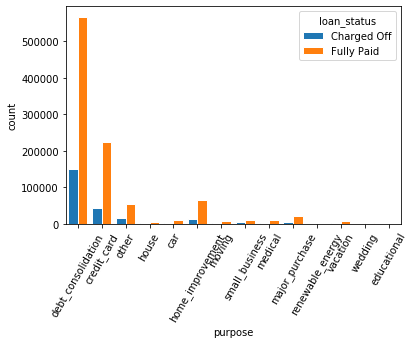

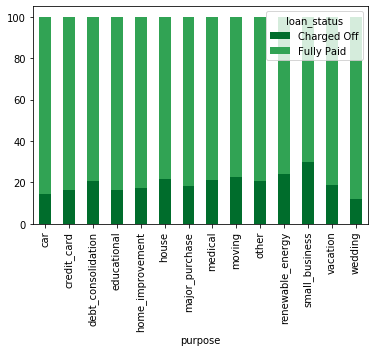

In [41]:
show_count_plot('purpose')
show_plot_percentage('purpose')

Tujuan peminjaman yang memiliki presentase status pinjaman paling banyak adalah untuk small business